# PROJECT 1A: SVM model on White Wine dataset
tpham328



IMPORT DATA


In [134]:
#import library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from warnings import filterwarnings
filterwarnings(action='ignore')

LOADING DATASET

In [135]:
data = pd.read_csv("winequality-white.csv")
print("Successfully Imported Data!")

data.head()
# print(data.shape)

Successfully Imported Data!


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [136]:
data.describe(include='all')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [137]:
print(data.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64


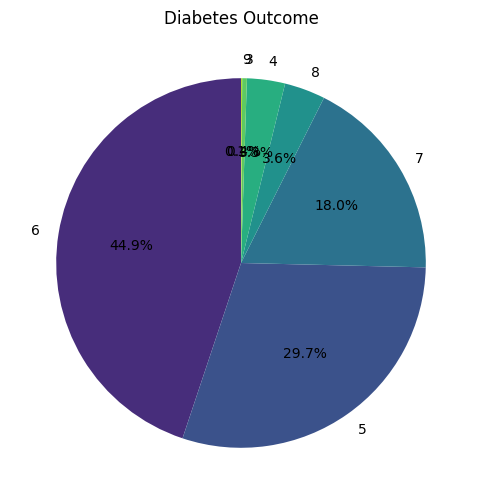

In [138]:
counts = data['quality'].value_counts()
print(counts)

plt.figure(figsize=(8, 6))
counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(counts)))
plt.title('Diabetes Outcome')
plt.ylabel('')  # Hide the y-label
plt.show()

In [139]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


Does not have multicollinearity

<Axes: >

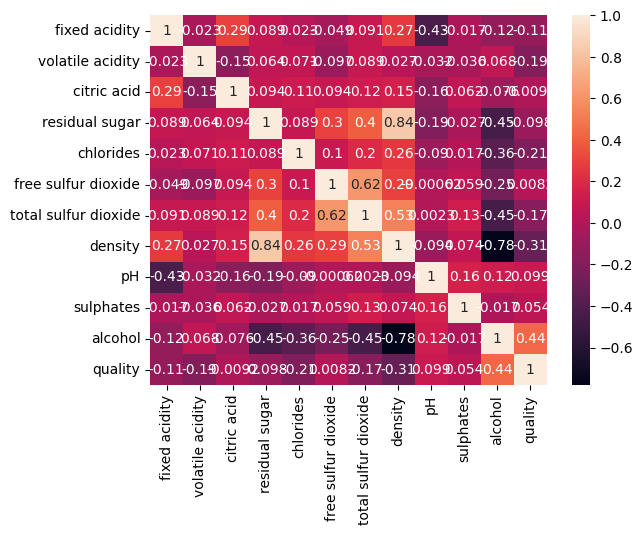

In [140]:
corr = data.corr()
sns.heatmap(corr,annot=True)

In [141]:
from sklearn.model_selection import train_test_split

X = data.drop(columns = 'quality')

# Y = data['quality']
# Y = [1 if x >= 7 else 0 for x in data['quality']]

# Y = data['quality'].apply(lambda x: 'low' if x <= 5 else 1 if x == 6 else 2)

original_Y = data['quality']
def class_quality(value):
    if value <= 5:
        return 'low'
    elif value == 6:
        return 'medium'
    elif value >= 7:
        return 'high'
Y = original_Y.apply(class_quality)


# filtered_data = data[data['quality'].isin([4, 5, 6, 7, 8])]
# X = filtered_data.drop(columns='quality')
# Y = filtered_data['quality']

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X = scaler.fit_transform(X)


Y.value_counts(1)



quality
medium    0.448755
low       0.334831
high      0.216415
Name: proportion, dtype: float64

In [142]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,stratify=Y, random_state=328)

print(Y_train.value_counts(0))
print(Y_test.value_counts(0))

quality
medium    1758
low       1312
high       848
Name: count, dtype: int64
quality
medium    440
low       328
high      212
Name: count, dtype: int64


In [143]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, make_scorer, f1_score
from sklearn.model_selection import validation_curve, learning_curve, GridSearchCV, cross_val_score
from sklearn.svm import SVC
import optuna

In [144]:
# OPTIMAL HYPERPARAMETERS - RBF kernel

def objective(trial):
    kernel = trial.suggest_categorical('kernel', ['rbf'])
    C = trial.suggest_loguniform('C', 1, 10)
    gamma = trial.suggest_loguniform('gamma', 0.1, 10)

    if kernel == 'poly':
        degree = trial.suggest_int('degree', 2, 4)
        coef0 = trial.suggest_uniform('coef0', 0.0, 0.5)
        model = SVC(kernel=kernel, C=C, gamma=gamma, degree=degree, coef0=coef0)
    else:
        model = SVC(kernel=kernel, C=C, gamma=gamma)

    accuracy = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy').mean()
    return accuracy

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30,n_jobs=-1)

# Print the best hyperparameters
print("Best Score: ", study.best_value)
print("Best Parameters: ", study.best_params)


[I 2024-06-09 20:12:57,101] A new study created in memory with name: no-name-f2c7589e-6c4b-4411-80fc-ee593cea83a3
[I 2024-06-09 20:13:00,840] Trial 0 finished with value: 0.60158762738812 and parameters: {'kernel': 'rbf', 'C': 2.6413014429100357, 'gamma': 0.10697508522521341}. Best is trial 0 with value: 0.60158762738812.
[I 2024-06-09 20:13:01,224] Trial 10 finished with value: 0.6207287512706232 and parameters: {'kernel': 'rbf', 'C': 1.0253902757351419, 'gamma': 0.31357403699759717}. Best is trial 10 with value: 0.6207287512706232.
[I 2024-06-09 20:13:01,442] Trial 3 finished with value: 0.642934683451925 and parameters: {'kernel': 'rbf', 'C': 3.5270404258312635, 'gamma': 0.37260562781468864}. Best is trial 3 with value: 0.642934683451925.
[I 2024-06-09 20:13:01,474] Trial 4 finished with value: 0.6278755180233013 and parameters: {'kernel': 'rbf', 'C': 5.830463936445143, 'gamma': 0.21358069473910052}. Best is trial 3 with value: 0.642934683451925.
[I 2024-06-09 20:13:01,494] Trial 2 

Best Score:  0.6602878124429848
Best Parameters:  {'kernel': 'rbf', 'C': 1.6553954259390344, 'gamma': 1.1335749372631574}


In [145]:
# OPTIMAL HYPERPARAMETERS (FOR POLY kernel)

def objective(trial):
    kernel = 'poly'
    # C = trial.suggest_loguniform('C', 0.1, 10)
    C = 1.0
    degree = trial.suggest_int('degree', 2, 12)
    # degree = 3
    coef0 = 0.5
    # coef0 = trial.suggest_uniform('coef0', 0.0, 1.0)
    model = SVC(kernel=kernel, C=C, degree=degree, coef0=coef0)


    accuracy = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy').mean()
    return accuracy

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30,n_jobs=-1)

# Print the best hyperparameters
print("Best Score: ", study.best_value)
print("Best Parameters: ", study.best_params)

[I 2024-06-09 20:13:06,604] A new study created in memory with name: no-name-35fdcce8-41c7-4f9c-b2d3-bca493147795
[I 2024-06-09 20:13:08,987] Trial 15 finished with value: 0.5954573591888862 and parameters: {'degree': 2}. Best is trial 15 with value: 0.5954573591888862.
[I 2024-06-09 20:13:10,579] Trial 3 finished with value: 0.6079674590142571 and parameters: {'degree': 4}. Best is trial 3 with value: 0.6079674590142571.
[I 2024-06-09 20:13:10,589] Trial 5 finished with value: 0.6079674590142571 and parameters: {'degree': 4}. Best is trial 3 with value: 0.6079674590142571.
[I 2024-06-09 20:13:11,258] Trial 0 finished with value: 0.6110312899106003 and parameters: {'degree': 5}. Best is trial 0 with value: 0.6110312899106003.
[I 2024-06-09 20:13:11,506] Trial 9 finished with value: 0.6110312899106003 and parameters: {'degree': 5}. Best is trial 0 with value: 0.6110312899106003.
[I 2024-06-09 20:13:11,538] Trial 4 finished with value: 0.6110312899106003 and parameters: {'degree': 5}. Be

Best Score:  0.6174114473375557
Best Parameters:  {'degree': 6}


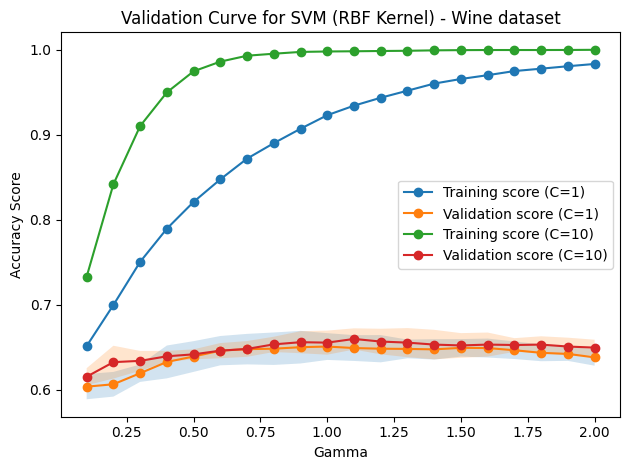

In [146]:
# VALIDATION CURVE


# Define the parameter range
gamma_range = np.arange(0.1, 2.1, 0.1)

# Validation curve for C = 1
train_scores_C1, val_scores_C1 = validation_curve(
    SVC(kernel='rbf', C=1), X_train, Y_train, param_name='gamma', param_range=gamma_range,
    scoring='accuracy', cv=5
)

# Validation curve for C = 10
train_scores_C10, val_scores_C10 = validation_curve(
    SVC(kernel='rbf', C=10), X_train, Y_train, param_name='gamma', param_range=gamma_range,
    scoring='accuracy', cv=5
)

# Calculate mean and standard deviation
train_mean_C1 = np.mean(train_scores_C1, axis=1)
# train_std_C1 = np.std(train_scores_C1, axis=1)
val_mean_C1 = np.mean(val_scores_C1, axis=1)
val_std_C1 = np.std(val_scores_C1, axis=1)

train_mean_C10 = np.mean(train_scores_C10, axis=1)
# train_std_C10 = np.std(train_scores_C10, axis=1)
val_mean_C10 = np.mean(val_scores_C10, axis=1)
val_std_C10 = np.std(val_scores_C10, axis=1)

# Plot the validation curve
# plt.figure(figsize=(12, 6))

# Plot for C = 1
plt.plot(gamma_range, train_mean_C1, label='Training score (C=1)', marker='o')
plt.plot(gamma_range, val_mean_C1, label='Validation score (C=1)', marker='o')
plt.fill_between(gamma_range, val_mean_C1 - val_std_C1, val_mean_C1 + val_std_C1, alpha=0.2)

# Plot for C = 10
plt.plot(gamma_range, train_mean_C10, label='Training score (C=10)', marker='o')
plt.plot(gamma_range, val_mean_C10, label='Validation score (C=10)', marker='o')
plt.fill_between(gamma_range, val_mean_C10 - val_std_C10, val_mean_C10 + val_std_C10, alpha=0.2)
plt.title('Validation Curve for SVM (RBF Kernel) - Wine dataset')
plt.xlabel('Gamma')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

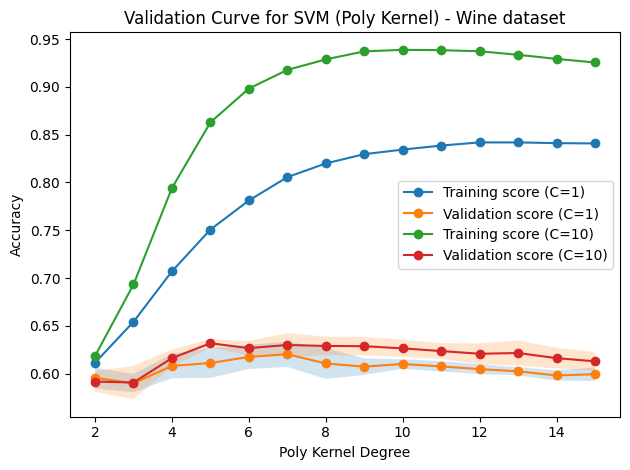

In [147]:
# VALIDATION CURVE - POLY KERNEL


# Define the parameter range
degree_range = np.arange(2, 16, 1)

# Validation curve for C = 1
train_scores_C1, val_scores_C1 = validation_curve(
    SVC(kernel='poly', C=1,coef0 = 0.5), X_train, Y_train, param_name='degree', param_range=degree_range,
    scoring='accuracy', cv=5
)

# Validation curve for C = 10
train_scores_C10, val_scores_C10 = validation_curve(
    SVC(kernel='poly', C=10,coef0=0.5), X_train, Y_train, param_name='degree', param_range=degree_range,
    scoring='accuracy', cv=5
)

# Calculate mean and standard deviation
train_mean_C1 = np.mean(train_scores_C1, axis=1)
# train_std_C1 = np.std(train_scores_C1, axis=1)
val_mean_C1 = np.mean(val_scores_C1, axis=1)
val_std_C1 = np.std(val_scores_C1, axis=1)

train_mean_C10 = np.mean(train_scores_C10, axis=1)
# train_std_C10 = np.std(train_scores_C10, axis=1)
val_mean_C10 = np.mean(val_scores_C10, axis=1)
val_std_C10 = np.std(val_scores_C10, axis=1)

# Plot the validation curve
# plt.figure(figsize=(12, 6))

# Plot for C = 1
plt.plot(degree_range, train_mean_C1, label='Training score (C=1)', marker='o')
plt.plot(degree_range, val_mean_C1, label='Validation score (C=1)', marker='o')
plt.fill_between(degree_range, val_mean_C1 - val_std_C1, val_mean_C1 + val_std_C1, alpha=0.2)

# Plot for C = 10
plt.plot(degree_range, train_mean_C10, label='Training score (C=10)', marker='o')
plt.plot(degree_range, val_mean_C10, label='Validation score (C=10)', marker='o')
plt.fill_between(degree_range, val_mean_C10 - val_std_C10, val_mean_C10 + val_std_C10, alpha=0.2)
plt.title('Validation Curve for SVM (Poly Kernel) - Wine dataset')
plt.xlabel('Poly Kernel Degree')
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

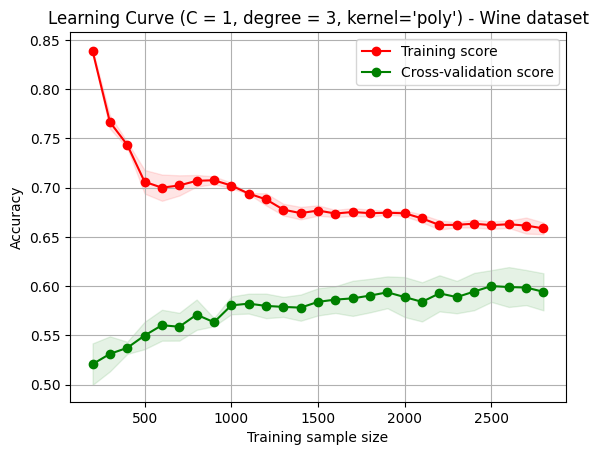

In [157]:
# LEARNING CURVE - POLY


svm = SVC(C = 1, coef0 = 1, degree = 3, kernel ='poly' )

train_sizes = np.arange(200, 2900, 100)

train_sizes, train_scores, test_scores = learning_curve(
    svm,
    X_train, Y_train,
    cv = 5,
    train_sizes=train_sizes,
    scoring='accuracy'
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
# plt.figure(figsize=(12, 6))
plt.title("Learning Curve (C = 1, degree = 3, kernel='poly') - Wine dataset")
plt.xlabel("Training sample size")
plt.ylabel("Accuracy")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

# Plot the cross-validation scores with standard deviation
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

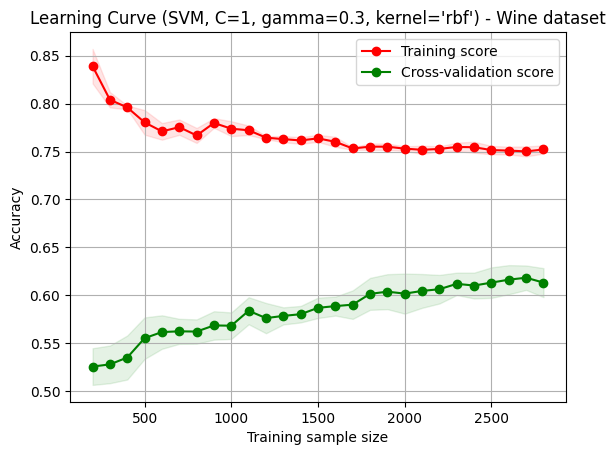

In [158]:
# LEARNING CURVE - RBF


svm = SVC(C = 1, gamma=0.3, kernel ='rbf' )

train_sizes = np.arange(200, 2900, 100)

train_sizes, train_scores, test_scores = learning_curve(
    svm,
    X_train, Y_train,
    cv = 5,
    train_sizes=train_sizes,
    scoring='accuracy'
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
# plt.figure(figsize=(12, 6))
plt.title("Learning Curve (SVM, C=1, gamma=0.3, kernel='rbf') - Wine dataset")
plt.xlabel("Training sample size")
plt.ylabel("Accuracy")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

# Plot the cross-validation scores with standard deviation
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


In [150]:
svm = SVC(C = 1, gamma=0.3, kernel ='rbf' )

svm.fit(X_train,Y_train)
y_pred = svm.predict(X_test)

print("Classification Report without SMOTE:")
print(classification_report(Y_test, y_pred, target_names=['low', 'medium', 'high']))
print("Accuracy Score: ",accuracy_score(Y_test, y_pred))

Classification Report without SMOTE:
              precision    recall  f1-score   support

         low       0.69      0.47      0.56       212
      medium       0.72      0.66      0.69       328
        high       0.60      0.73      0.66       440

    accuracy                           0.65       980
   macro avg       0.67      0.62      0.63       980
weighted avg       0.66      0.65      0.65       980

Accuracy Score:  0.6489795918367347
